In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

**Loading DataSets**

In [8]:
df = pd.read_csv("teleCust.csv")

In [10]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Getting to Understand the DataSet**

In [15]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------------------")

region
region
3    344
2    334
1    322
Name: count, dtype: int64
-----------------------------
tenure
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
-----------------------------
age
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
-----------------------------
marital
marital
0    505
1    495
Name: count, dtype: int64
-----------------------------
address
address
1     68
2  

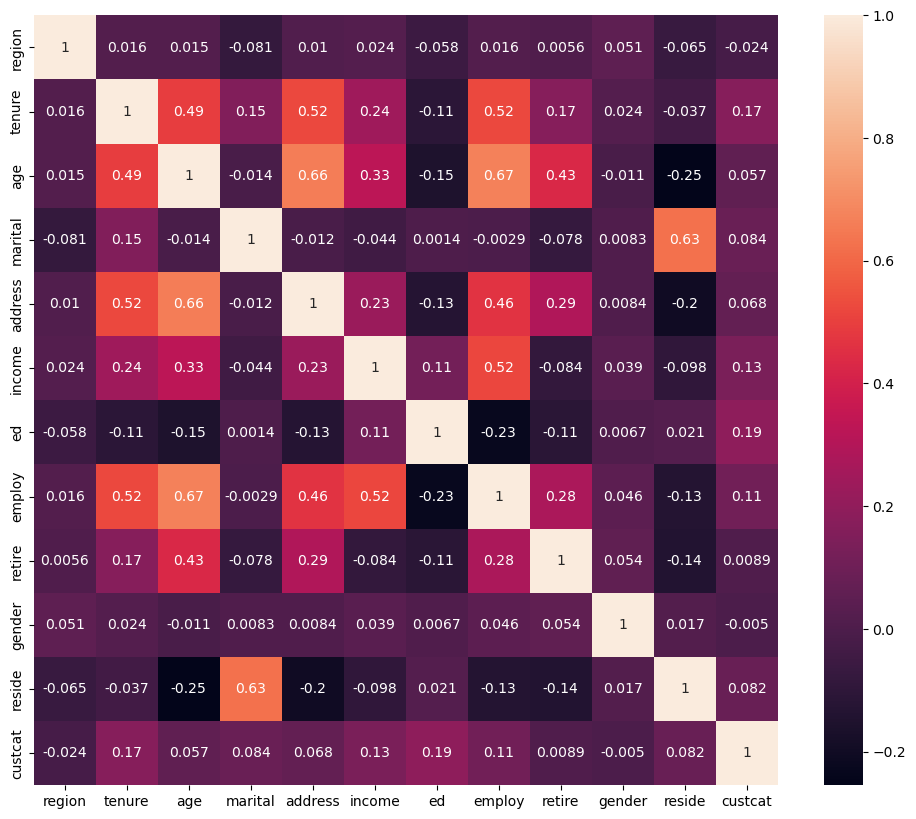

In [27]:
plt.figure(figsize = (12, 10))
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
df.drop(["gender", "retire"], axis = 1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 78.3 KB


In [33]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
reside     0
custcat    0
dtype: int64

In [35]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,reside,custcat
0,2,13,44,1,9,64.0,4,5,2,1
1,3,11,33,1,7,136.0,5,5,6,4
2,3,68,52,1,24,116.0,1,29,2,3
3,2,33,33,0,12,33.0,2,0,1,1
4,2,23,30,1,9,30.0,1,2,4,3


In [45]:
region = pd.get_dummies(df['region'], drop_first = True, prefix = "region").astype(int)
reside = pd.get_dummies(df['reside'], drop_first = True, prefix = "reside").astype(int)
ed = pd.get_dummies(df['ed'], drop_first = True, prefix = "ed").astype(int)

In [47]:
df.drop(["region", "reside", "ed"], axis = 1, inplace = True)

In [49]:
df = pd.concat([df, region, reside, ed], axis = 1)

In [51]:
df.head()

,tenure,age,marital,address,income,employ,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,ed_2,ed_3,ed_4,ed_5
0,13,44,1,9,64.0,5,1,1,0,1,0,0,0,0,0,0,0,0,1,0
1,11,33,1,7,136.0,5,4,0,1,0,0,0,0,1,0,0,0,0,0,1
2,68,52,1,24,116.0,29,3,0,1,1,0,0,0,0,0,0,0,0,0,0
3,33,33,0,12,33.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,23,30,1,9,30.0,2,3,1,0,0,0,1,0,0,0,0,0,0,0,0


**Standardization of Variables**

In [55]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaled_columns = df[["tenure", "age", "address", "income", "employ"]]

In [61]:
scaler = StandardScaler()

In [63]:
scaler.fit(scaled_columns)

StandardScaler()

In [65]:
scaled_columns = scaler.transform(scaled_columns)

In [71]:
df_scaled = pd.DataFrame(scaled_columns, columns = ["tenure", "age", "address", "income", "employ"])

In [73]:
df_scaled.head()

,tenure,age,address,income,employ
0,-1.055125,0.184505,-0.253034,-0.126506,-0.594123
1,-1.148806,-0.691812,-0.451415,0.546450,-0.594123
2,1.521092,0.821826,1.234819,0.359517,1.787528
3,-0.118319,-0.691812,0.044536,-0.416251,-1.090300
4,-0.586722,-0.930808,-0.253034,-0.444291,-0.891829


In [75]:
df.drop(["tenure", "age", "address", "income", "employ"], axis= 1, inplace = True)

In [77]:
df = pd.concat([df, df_scaled], axis = 1)

In [79]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,ed_2,ed_3,ed_4,ed_5,tenure,age,address,income,employ
0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,-1.055125,0.184505,-0.253034,-0.126506,-0.594123
1,1,4,0,1,0,0,0,0,1,0,0,0,0,0,1,-1.148806,-0.691812,-0.451415,0.546450,-0.594123
2,1,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517,1.787528
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,-0.118319,-0.691812,0.044536,-0.416251,-1.090300
4,1,3,1,0,0,0,1,0,0,0,0,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291,-0.891829


**K Nearest Neighbor Modelling**

In [82]:
X = df.drop(["custcat"], axis = 1)
y = df["custcat"]

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
print("Train set", X_train.shape, y_train.shape)
print("Test set", X_test.shape, y_test.shape)

Train set (800, 19) (800,)
Test set (200, 19) (200,)


In [94]:
from sklearn.neighbors import KNeighborsClassifier 

In [98]:
k = 6
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [102]:
y_pred = knn_model.predict(X_test)

In [104]:
from sklearn import metrics

In [106]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.34


** K = 10 **

In [119]:
k = 10
knn_model2 = KNeighborsClassifier(n_neighbors = k)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [121]:
y_pred2 = knn_model.predict(X_test)

In [123]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred2))

Accuracy Score: 0.34


**k = 12**

In [128]:
k = 12
knn_model3 = KNeighborsClassifier(n_neighbors = k)
knn_model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [130]:
y_pred3 = knn_model.predict(X_test)

In [132]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred3))

Accuracy Score: 0.34


In [134]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [136]:
y_pred = knn_model.predict(X_test)

In [138]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

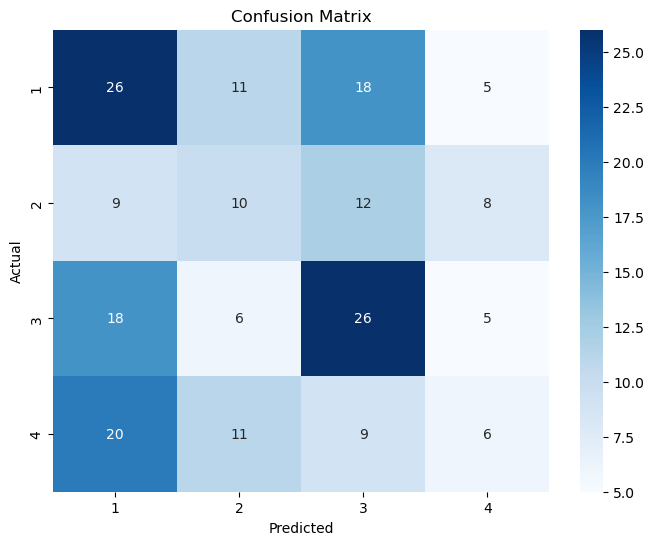

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [148]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.34

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.43      0.39        60
           2       0.26      0.26      0.26        39
           3       0.40      0.47      0.43        55
           4       0.25      0.13      0.17        46

    accuracy                           0.34       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.33      0.34      0.33       200

